In [26]:
import pandas as pd
import numpy as np
import wordcloud
import spacy
import nltk
import matplotlib.pyplot as plt
from scipy import stats


In [27]:
df = pd.read_parquet('data/steam_reviews.parquet')

In [28]:
df

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
18,292030,The Witcher 3: Wild Hunt,85180436,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,...,True,False,False,76561198065591528,33,1,23329.0,177.0,23329.0,1.611219e+09
20,292030,The Witcher 3: Wild Hunt,85179753,english,Why wouldn't you get this,1611371978,1611371978,True,0,0,...,True,False,False,76561198996835044,131,2,8557.0,2004.0,8557.0,1.611371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747364,546560,Half-Life: Alyx,65645167,english,best game ever\n,1584986750,1584986750,True,0,0,...,True,False,False,76561198817267089,86,8,1055.0,14.0,45.0,1.611138e+09
21747366,546560,Half-Life: Alyx,65645125,english,Holy balls,1584986704,1584986704,True,0,0,...,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,1.586628e+09
21747367,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",1584986693,1584986693,True,0,0,...,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,1.611080e+09
21747368,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,1584986673,1584986673,True,0,0,...,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,1.591634e+09


In [29]:
display(df['votes_funny'].sort_values(ascending=False), df['votes_helpful'].sort_values(ascending=False))

10157027    4294967295
10446262    4294967295
4484829     4294967295
10396427    4294967295
15370975    4294967295
               ...    
7447037              0
7447036              0
7447035              0
7447034              0
21747369             0
Name: votes_funny, Length: 9635437, dtype: int64

10751984    4398046511106
5806427             29608
7824298             28211
19415901            19707
16913851            16993
                ...      
8115298                 0
8115297                 0
8115284                 0
8115279                 0
21747369                0
Name: votes_helpful, Length: 9635437, dtype: int64

In [30]:
# Remove fucking botted outliers ffs

z_scores = np.abs(stats.zscore(df['votes_funny']))
df_clean = df[z_scores < 3]
z_scores_2 = np.abs(stats.zscore(df_clean['votes_helpful']))
df_clean = df_clean[z_scores_2 < 3]

In [32]:
display(df_clean['votes_funny'].sort_values(ascending=False), df_clean['votes_helpful'].sort_values(ascending=False))

14962872    15707
16875345    15417
3267103     14376
11330061    13806
5847968     13795
            ...  
7446966         0
7446965         0
7446964         0
7446963         0
21747369        0
Name: votes_funny, Length: 9635129, dtype: int64

5806427     29608
7824298     28211
19415901    19707
16913851    16993
7169361     16960
            ...  
8114981         0
8114980         0
8114976         0
8114974         0
21747369        0
Name: votes_helpful, Length: 9635129, dtype: int64

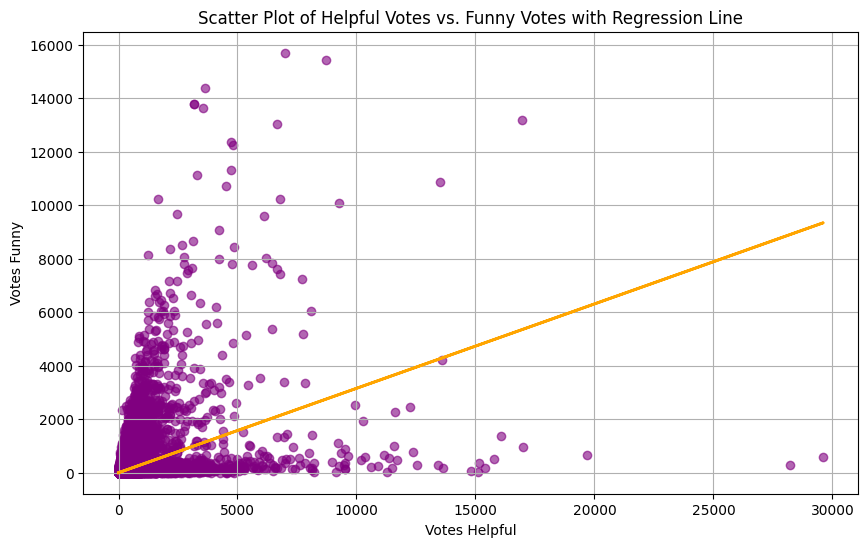

In [35]:
# Assuming df_clean is your DataFrame with 'votes_helpful' and 'votes_funny'

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['votes_helpful'], df_clean['votes_funny'], alpha=0.6, color='purple')

# Perform linear regression
slope, intercept = np.polyfit(df_clean['votes_helpful'], df_clean['votes_funny'], 1)
regression_line = slope * df_clean['votes_helpful'] + intercept

# Plot regression line
plt.plot(df_clean['votes_helpful'], regression_line, color='orange', linewidth=2)

# Labels and title
plt.title('Scatter Plot of Helpful Votes vs. Funny Votes with Regression Line')
plt.xlabel('Votes Helpful')
plt.ylabel('Votes Funny')
plt.grid(True)
plt.show()


In [40]:
df_clean[df_clean['votes_funny'] == max(df_clean['votes_funny'])]["review"]

14962872    Fun and challenging for both you and your pc.
Name: review, dtype: object

In [57]:
comment = df_clean[df_clean['votes_funny'] == max(df_clean['votes_funny'])]["review"].values[0]
game = df_clean[df_clean['votes_funny'] == max(df_clean['votes_funny'])]["app_name"].values[0]
votes = max(df_clean['votes_funny'])
print(f"Funniest comment: \n Game: {game} \n Votes: {votes} \n Comment: {comment}")

Funniest comment: 
 Game: PLAYERUNKNOWN'S BATTLEGROUNDS 
 Votes: 15707 
 Comment: Fun and challenging for both you and your pc.


In [58]:
comment = df_clean[df_clean['votes_helpful'] == max(df_clean['votes_helpful'])]["review"].values[0]
game = df_clean[df_clean['votes_helpful'] == max(df_clean['votes_helpful'])]["app_name"].values[0]
votes = max(df_clean['votes_helpful'])
print(f"Most helpful comment: \n Game: {game} \n Votes: {votes} \n Comment: {comment}")

Most helpful comment: 
 Game: Stardew Valley 
 Votes: 29608 
 Comment: [b]**NOTE: Updated as of 5/12/18**[/b]


[h1]INTRODUCTION[/h1]

Stardew Valley.

I've heard a lot of things about this game. A lot of extremely [i]positive[/i] things.

And I was doubtful. Was Stardew Valley [i]really[/i] that good? I was afraid that people were just giving it attention because they didn't actually know what a good game was. And as insulting as it may sound, in my defense, uhhm.... 

Before buying the game I hadn't really seen what it looked like, or knew what it was about. I just knew that it was published by the same company, Chucklefish, that had developed Starbound. I had loved Starbound.. So I was playing completely spoiler free. Haven't watched any videos, no tips & tricks, just the information of a billion recommended reviews stuffed into my head.

So I bought Stardew Valley, and had pretty high expectations. If a game received THAT much popularity, it should be seriously good, right?


[h1]W

In [64]:
import nltk
from collections import Counter
from nltk.corpus import stopwords


words = nltk.word_tokenize(comment)
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

word_frequencies = Counter(filtered_words)
most_common_words = word_frequencies.most_common(10)
most_common_words

[('.', 79),
 (',', 62),
 ('game', 29),
 ('[', 22),
 (']', 22),
 ("'s", 19),
 ('Stardew', 17),
 ('-', 16),
 ('Valley', 15),
 ("n't", 9)]

In [76]:
from gensim.utils import tokenize

tokens = list(tokenize(comment))

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in tokens if word.lower() not in stop_words]

word_frequencies = Counter(filtered_words)
most_common_words = word_frequencies.most_common(20)
most_common_words



[('game', 29),
 ('Stardew', 17),
 ('Valley', 16),
 ('h', 14),
 ('lot', 8),
 ('really', 7),
 ('things', 5),
 ('fun', 5),
 ('much', 4),
 ('first', 4),
 ('played', 4),
 ('find', 4),
 ('yet', 4),
 ('rewards', 4),
 ('hard', 4),
 ('play', 4),
 ('extremely', 3),
 ('good', 3),
 ('people', 3),
 ('know', 3)]

In [75]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\w']+")
tokens = tokenizer.tokenize(comment)


stop_words = set(stopwords.words('english'))
filtered_words = [word for word in tokens if word.lower() not in stop_words]


word_frequencies = Counter(filtered_words)
most_common_words = word_frequencies.most_common(20)
most_common_words

<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Markus\AppData\Local\Temp\ipykernel_23324\1330166418.py:3: SyntaxWarning: invalid escape sequence '\w'
  tokenizer = RegexpTokenizer("[\w']+")


[('game', 29),
 ('Stardew', 17),
 ('Valley', 16),
 ('h1', 14),
 ('lot', 8),
 ('really', 7),
 ('things', 5),
 ('fun', 5),
 ('much', 4),
 ('first', 4),
 ('played', 4),
 ('find', 4),
 ('yet', 4),
 ('rewards', 4),
 ('hard', 4),
 ('play', 4),
 ("I've", 3),
 ('extremely', 3),
 ('good', 3),
 ('people', 3)]

In [78]:
from gensim.utils import tokenize

tokens = [word for sentence in df_clean["review"] for word in list(tokenize(comment))]


stop_words = set(stopwords.words('english'))
filtered_words = [word for word in tokens if word.lower() not in stop_words]

word_frequencies = Counter(filtered_words)
most_common_words = word_frequencies.most_common(20)
most_common_words

